# browse SWOT - GDP global collocalisations

In [1]:
import os
from glob import glob
import threading

import xarray as xr
import pandas as pd
import numpy as np

%matplotlib inline
from matplotlib import pyplot as plt
#from mpl_toolkits.axes_grid1.inset_locator import inset_axes

#import cartopy.crs as ccrs
#import cartopy.feature as cfeature
#import cartopy.geodesic as cgeo

#import cmocean.cm as cm
#import gsw

#from xgcm import Grid
import pynsitu as pyn
crs = pyn.maps.crs

ERROR 1: PROJ: proj_create_from_database: Open of /home1/datawork/aponte/miniconda3/envs/equinox/share/proj failed


In [2]:
nc = "/home/datawork-cersat-public/cache/users/jfpiolle/felyx/mdb/swot/2023/20231119000000_SWOT_L3_LR_SSH_Unsmoothed__cmems_drifter.nc"
ds = xr.open_dataset(nc)
ds = ds.set_coords(["swot_lon", "swot_lat"])

In [3]:
ds

<xarray.Dataset>
Dimensions:                     (obs: 146, site_obs: 13, swot_row: 41,
                                 swot_cell: 41)
Coordinates:
    time                        (obs) datetime64[ns] ...
    lon                         (obs) float64 ...
    lat                         (obs) float64 ...
    swot_lat                    (obs, swot_row, swot_cell) float32 ...
    swot_lon                    (obs, swot_row, swot_cell) float32 ...
Dimensions without coordinates: obs, site_obs, swot_row, swot_cell
Data variables: (12/30)
    __site_id                   (obs) <U7 ...
    __site_name                 (obs) <U7 ...
    cmems_drifter_time          (obs, site_obs) datetime64[ns] ...
    cmems_drifter_lat           (obs, site_obs) float64 ...
    cmems_drifter_lon           (obs, site_obs) float64 ...
    cmems_drifter_time_qc       (obs, site_obs) float32 ...
    ...                          ...
    swot_time                   (obs, swot_row) datetime64[ns] ...
    swot_vgos                   (obs, swot_row, swot_cell) float64 ...
    swot_source                 (obs) <U22 ...
    swot_vgosa                  (obs, swot_row, swot_cell) float64 ...
    swot_calibration            (obs, swot_row, swot_cell) float64 ...
    swot___source_slices        (obs) <U65 ...
Attributes: (12/64)
    __id:                                 SWOT_L3_LR_SSH_Unsmoothed__cmems_dr...
    __time_coverage_end:                  2023-11-20T00:00:00
    __time_coverage_start:                2023-11-19T00:00:00
    swot_Conventions:                     CF-1.7
    swot_Metadata_Conventions:            Unidata Dataset Discovery v1.0
    swot___acknowledgement:               
    ...                                   ...
    swot_standard_name_vocabulary:        NetCDF Climate and Forecast (CF) Me...
    swot_time_coverage_begin:             2023-11-19T10:02:11Z
    swot_time_coverage_end:               2023-11-19T10:52:56Z
    swot_time_coverage_resolution:        P1S
    swot_time_coverage_start:             2023-11-19T10:02:11Z
    swot_title:                           NRT SWOT KaRIn & nadir Global Ocean...

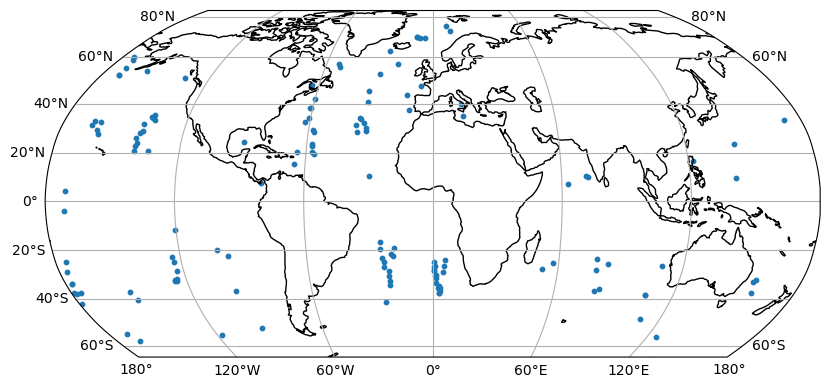

In [4]:
fig, ax, _ = pyn.maps.plot_map()
ax.scatter(ds.lon, ds.lat, s=10, transform=crs)

In [29]:
def plot_colloc(ds, ax=None):

    if ax is None:
        fig, ax = plt.subplots(1,1)
    
    # swot
    #ds.swot_ssha_noiseless.plot.contourf(x="swot_lon", y="swot_lat", ax=ax, levels=20, add_colorbar=False)
    #ds.swot_ssha_noiseless.plot.scatter(x="swot_lon", y="swot_lat", ax=ax, levels=20, add_colorbar=False)
    ax.scatter(ds.swot_lon, ds.swot_lat, c=ds.swot_ssha_noiseless, s=20, marker="s", cmap="viridis")
    
    # drifter
    ax.scatter(ds["cmems_drifter_lon"], ds["cmems_drifter_lat"], c="0.9", edgecolor="k")
    
    ds0 = ds.isel(site_obs=13//2)
    ax.scatter(ds0["cmems_drifter_lon"], ds0["cmems_drifter_lat"], s=50, c="C1", edgecolor="k")
    
    ds_end = ds.isel(site_obs=-1)
    ax.scatter(ds_end["cmems_drifter_lon"], ds_end["cmems_drifter_lat"], c="C2", s=100, marker="*")

    ax.set_xlabel("")
    ax.set_ylabel("")
    ax.set_title("")

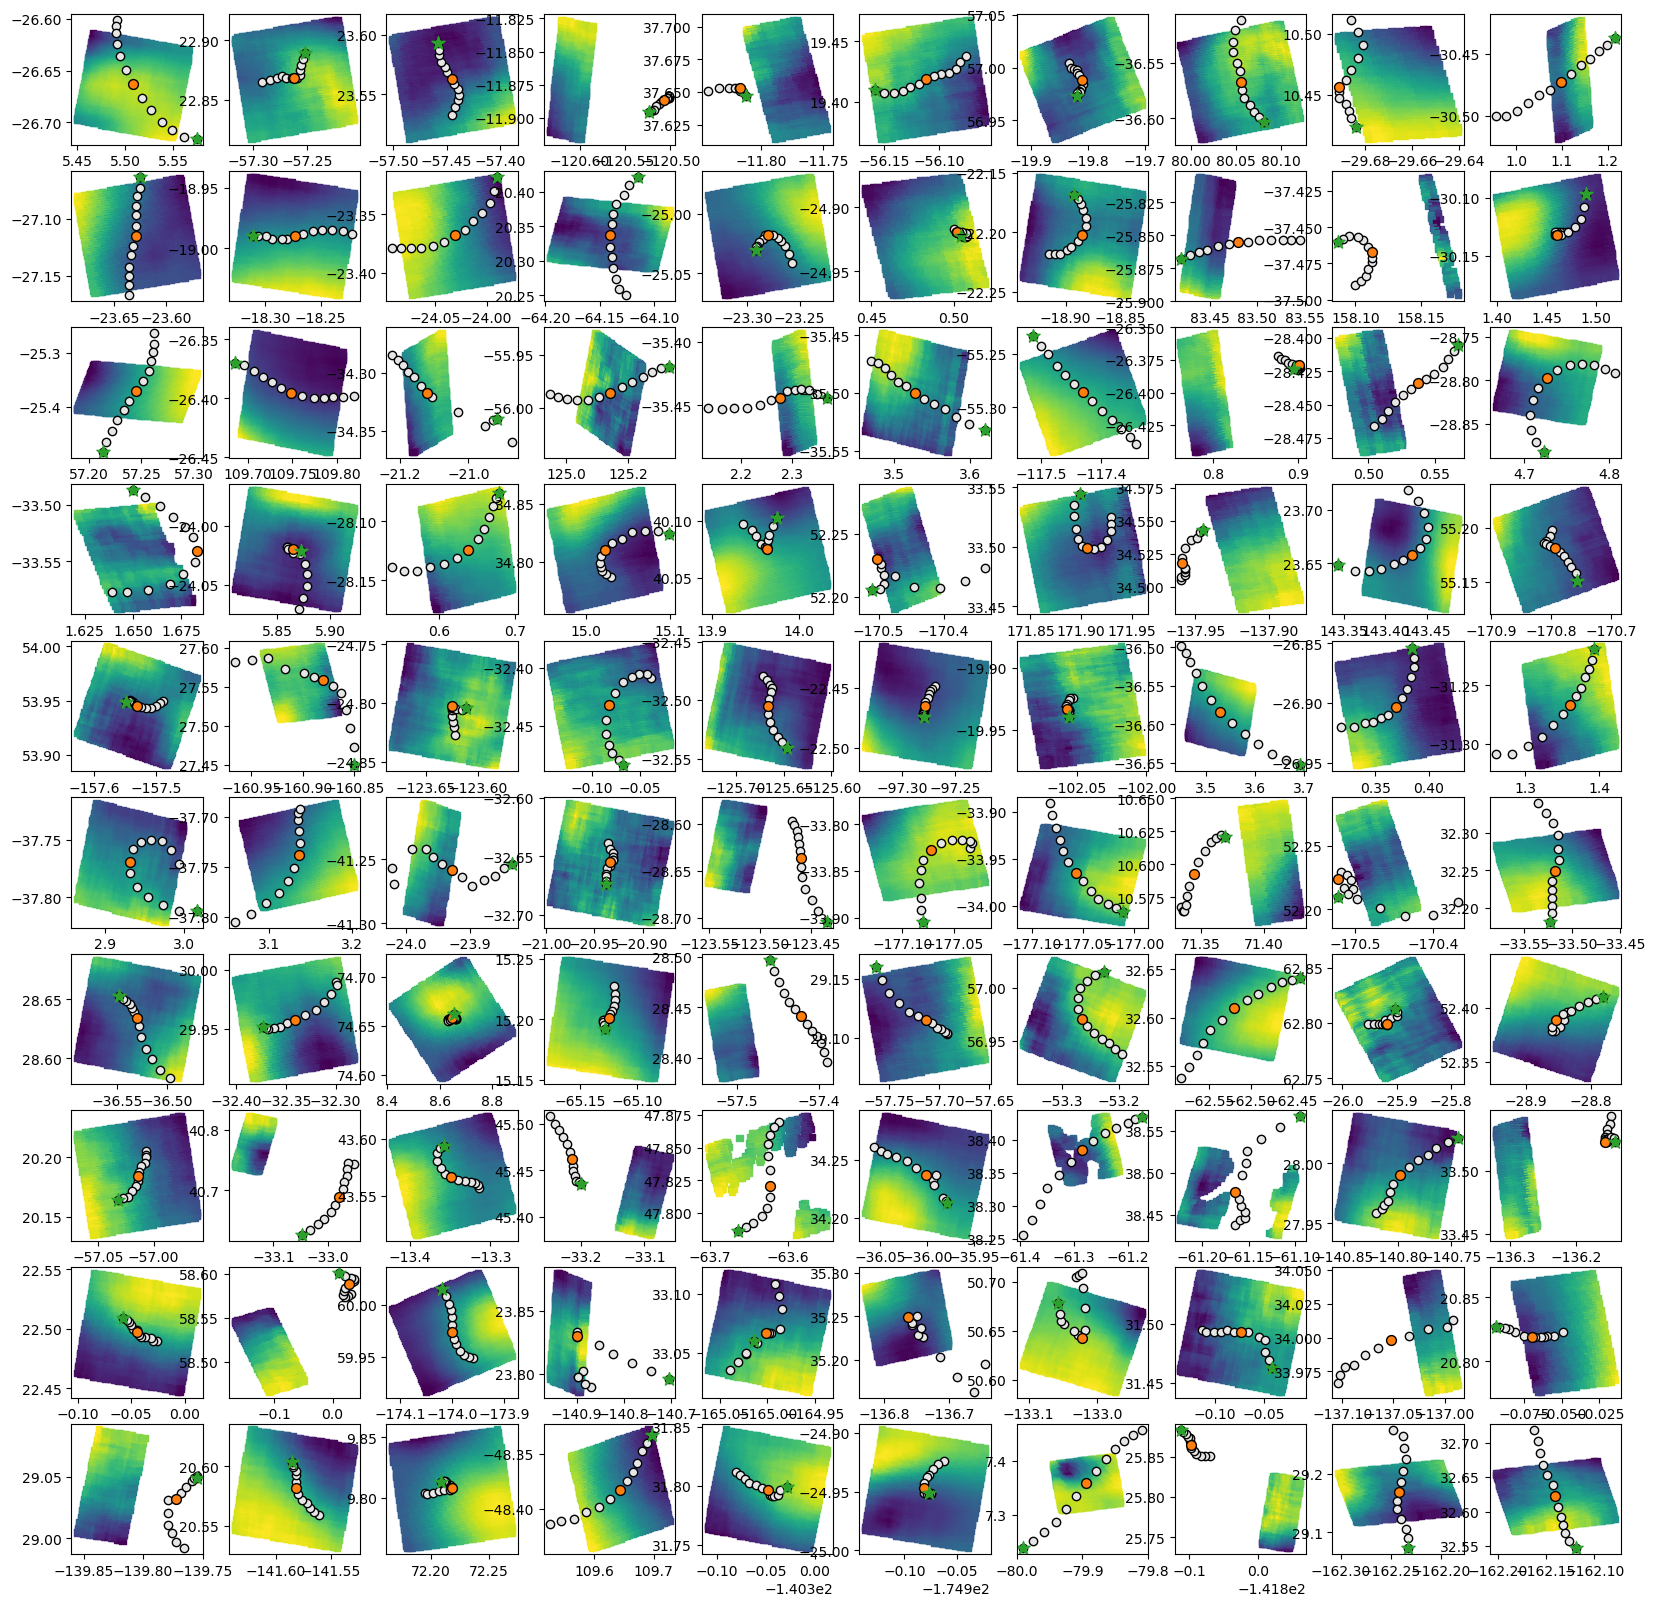

In [34]:
fig, axes = plt.subplots(10,10, figsize=(20,20))

for o, _ax in zip(range(100), axes.flatten()):
    plot_colloc(ds.isel(obs=o), ax=_ax)

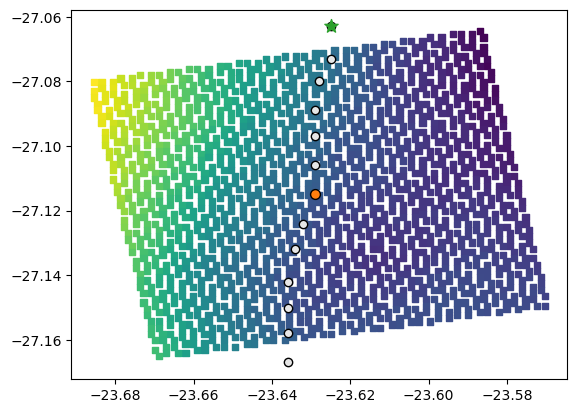

In [35]:
# good case
plot_colloc(ds.isel(obs=10))

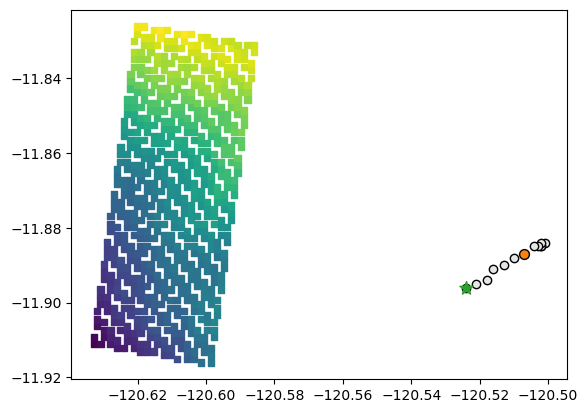

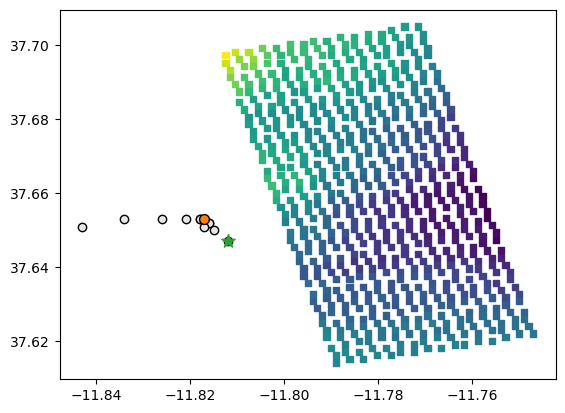

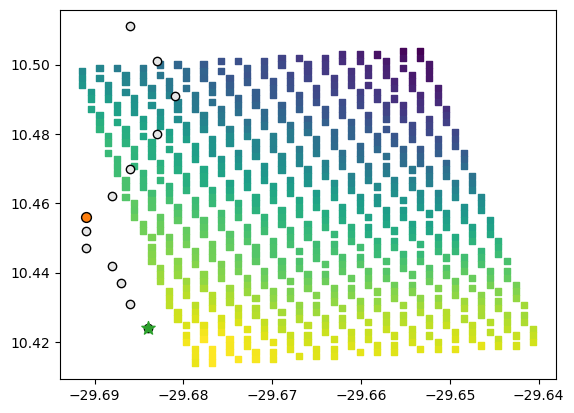

In [36]:
# couple of bad cases
plot_colloc(ds.isel(obs=3))
plot_colloc(ds.isel(obs=4))
plot_colloc(ds.isel(obs=8))

In [39]:
ds.isel(obs=8).swot_lon.values[:10,:10]

array([[-29.65332 , -29.655273, -29.658203, -29.660156, -29.66211 ,
        -29.664062, -29.666992, -29.668945, -29.670898, -29.673828],
       [-29.65332 , -29.655273, -29.657227, -29.660156, -29.66211 ,
        -29.664062, -29.666016, -29.668945, -29.670898, -29.672852],
       [-29.652344, -29.655273, -29.657227, -29.65918 , -29.661133,
        -29.664062, -29.666016, -29.667969, -29.670898, -29.672852],
       [-29.652344, -29.654297, -29.657227, -29.65918 , -29.661133,
        -29.663086, -29.666016, -29.667969, -29.669922, -29.672852],
       [-29.652344, -29.654297, -29.65625 , -29.65918 , -29.661133,
        -29.663086, -29.66504 , -29.667969, -29.669922, -29.671875],
       [-29.651367, -29.654297, -29.65625 , -29.658203, -29.660156,
        -29.663086, -29.66504 , -29.666992, -29.669922, -29.671875],
       [-29.651367, -29.65332 , -29.65625 , -29.658203, -29.660156,
        -29.66211 , -29.66504 , -29.666992, -29.668945, -29.671875],
       [-29.651367, -29.65332 , -29.65527

In [41]:
.04*111

4.44